# 导入基础依赖

In [177]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
from torch import nn
import torch


# 定义超参数

In [178]:
batch_size = 64
learning_rate = 0.01
momentum = 0.5
EPOCH=10

# 加载Dataset

In [179]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(mean=0.1307, std=0.3081)]
)
train_data_set = datasets.MNIST(
    "./dataset", train=True, download=True, transform=transform
)
test_data_set = datasets.MNIST(
    "./dataset", train=False, download=True, transform=transform
)


In [180]:
tensor, label = train_data_set[0]

print("tensor.shape:{}".format(tensor.shape))
print("train_data_set length:{}".format(len(train_data_set)))
print("tensor:{}".format(tensor))
print("label:{}".format(label))

tensor.shape:torch.Size([1, 28, 28])
train_data_set length:60000
tensor:tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.

# 加载DataLoader

In [181]:
train_loader = DataLoader(train_data_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data_set, batch_size=batch_size, shuffle=False)

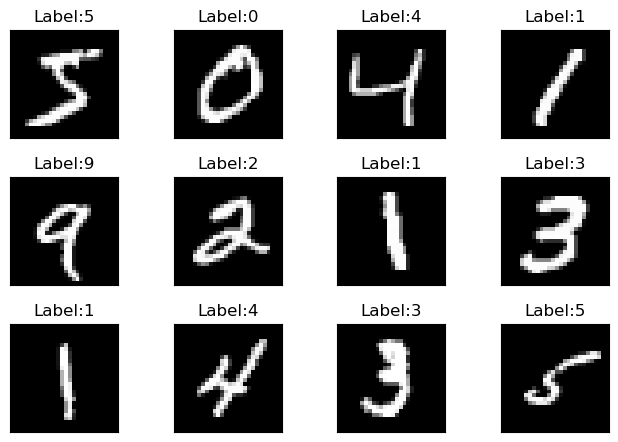

In [182]:
fig=plt.figure()
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(train_data_set.data[i],cmap='gray',interpolation='none')
  plt.title("Label:{}".format(train_data_set.targets[i]))
  plt.xticks([])
  plt.yticks([])

plt.show()

# 构建神经网络

In [183]:
# 输入为 1x28x28，单通道，宽高为28像素，
model = nn.Sequential(
    # 第一层卷积，输出为 10x24x24
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    # 池化，输出为 10x12x12
    nn.MaxPool2d(kernel_size=2),
    # 第二层卷积，输出为 20x8x8
    nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5),
    nn.ReLU(),
    # 池化，输出为 20x4x4
    nn.MaxPool2d(kernel_size=2),
    # 展平
    nn.Flatten(),
    # 全连接层
    nn.Linear(in_features=20 * 4 * 4, out_features=50),
    nn.Linear(in_features=50, out_features=10),
)

In [184]:
# 定义损失函数
loss_func = nn.CrossEntropyLoss()
# 定义优化器
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 训练模型

In [185]:
# 定义单次训练函数
def train(epoch):
    running_loss = 0.0
    running_correct = 0
    running_total = 0
    for batch_idx, data in enumerate(train_loader, 0):
        input, target = data
        # 清除上个batch的梯度信息
        optimizer.zero_grad()

        # forward + backward + update
        outputs = model(input)
        loss = loss_func(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, dim=1)
        running_total += input.shape[0]
        running_correct += (predicted == target).sum().item()

        if batch_idx % 300 == 299:
            print(
                "[{}, {}] loss: {}  acc: {}".format(
                    epoch + 1,
                    batch_idx + 1,
                    running_loss / 300,
                    100 * running_correct / running_total,
                )
            )
            running_loss = 0
            running_correct = 0
            running_total = 0


# train(0)

In [186]:
# 定义测试
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            input, labels = data
            outputs = model(input)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    return acc

# test()

[1, 300] loss: 1.2471507714688779  acc: 67.04166666666667
[1, 600] loss: 0.2871868324528138  acc: 91.56770833333333
[1, 900] loss: 0.21249960472186408  acc: 93.81770833333333
[2, 300] loss: 0.16639259627709785  acc: 95.09375
[2, 600] loss: 0.13909584090734523  acc: 96.03125
[2, 900] loss: 0.12467536723862092  acc: 96.1875
[3, 300] loss: 0.11289324161907037  acc: 96.71875
[3, 600] loss: 0.1058250657375902  acc: 96.78125
[3, 900] loss: 0.09683827854072054  acc: 97.015625
[4, 300] loss: 0.08814760435993473  acc: 97.19791666666667
[4, 600] loss: 0.0913789165376996  acc: 97.27604166666667
[4, 900] loss: 0.0873097718693316  acc: 97.47916666666667
[5, 300] loss: 0.08138911727194985  acc: 97.58854166666667
[5, 600] loss: 0.07945766864034037  acc: 97.63020833333333
[5, 900] loss: 0.07046901687048375  acc: 97.859375
[6, 300] loss: 0.06786579552882661  acc: 97.86458333333333
[6, 600] loss: 0.06982392765115947  acc: 97.95833333333333
[6, 900] loss: 0.07050896235353624  acc: 97.96875
[7, 300] loss:

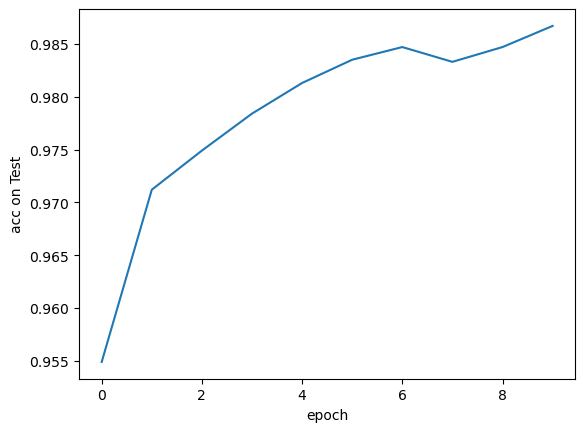

In [187]:
acc_list_test = []
for epoch in range(EPOCH):
    train(epoch)
    acc_test = test()
    acc_list_test.append(acc_test)

plt.plot(acc_list_test)
plt.xlabel("epoch")
plt.ylabel("acc on Test")
plt.show()